In [98]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas import json_normalize
from mplsoccer import Pitch
from FCPython import createPitch
from Metrica_Viz import plot_events

In [71]:
pitchLengthX=120
pitchWidthY=80

match_id = 69301
home_team ="England Women's"
away_team ="Sweden Women's"
file_name = str(match_id)+'.json'

In [72]:
with open('Statsbomb/data/events/' + file_name) as f:
    data = json.load(f)

In [73]:
df = json_normalize(data, sep="_").assign(match_id = file_name[:-5])

In [109]:
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
goal = shots.loc[shots['shot_outcome_name'] == 'Goal']
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')
#plot_events(shots.loc[335:340], color='k', indicators =['Marler', 'Arrow'], annotate=True)

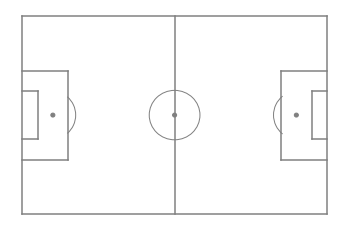

In [110]:
(fig, ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

In [111]:
%matplotlib inline
for i,p in passes.iterrows():
    #print(p['player_name'])
    if p['player_name']=='Francesca Kirby':
        x = p['location'][0]
        y = p['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="blue")
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=p['pass_end_location'][0]-x
        dy=p['pass_end_location'][1]-y
        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="blue")
        ax.add_patch(passArrow)

    
fig.set_size_inches(10, 7)
fig.savefig('Output/passes.pdf', dpi=100) 
plt.show()